# Python : Analyse statistique multidimensionnelle

### Sommaire

- [Analyse en composantes principales (ACP)](#acp) 
- [Analyse factorielle des correspondances (AFC)](#afc)
- [Analyses des correspondances multiples (ACM)](#acm)
- [Décomposition en valeurs singulière (SVD)](#svd) 
- [Positionnement multidimensionnel(MDS)](#mds)
- [Auto-encodeurs](#aue)

# Analyse en composantes principales (ACP)
<a id='acp'/>

In [1]:
from IPython.display import display
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data/ozone.csv",sep=";")
df = df.drop("obs", axis=1)

print("Nbre d'observation : {}\nNbre de variables : {}".format(*df.shape))
display(df.head(n=2))
print()
display(df.tail(n=2))

Nbre d'observation : 112
Nbre de variables : 13


,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec
1,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec


,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
110,83,16.9,19.8,22.1,6,5,3,-4.0,-3.7588,-4.0,99,Ouest,Pluie
111,70,15.7,18.6,20.7,7,7,7,0.0,-1.0419,-4.0,83,Sud,Sec


In [2]:
numerical_columns = ['T9', 'T12', 'T15',  'Vx9', 'Vx12', 'Vx15', 'maxO3', 'Ne9', 'Ne12', 'Ne15', 'maxO3v']
categorical_columns = ['vent', 'pluie']

data_x = df[numerical_columns]
data_y = df[categorical_columns]

In [3]:
### Standardisation des données
from sklearn.preprocessing import StandardScaler
data_x_scaled = StandardScaler().fit_transform(data_x)

In [4]:
######## Mise en oeuvre de l'ACP

from sklearn.decomposition import PCA

pca = PCA()

# Calcul des coordonnées des individus sur les composantes principales
data_coord_ind = pca.fit_transform(data_x_scaled) 

# observer la variance expliquée par les composantes
ebouli = pd.Series(pca.explained_variance_ratio_)

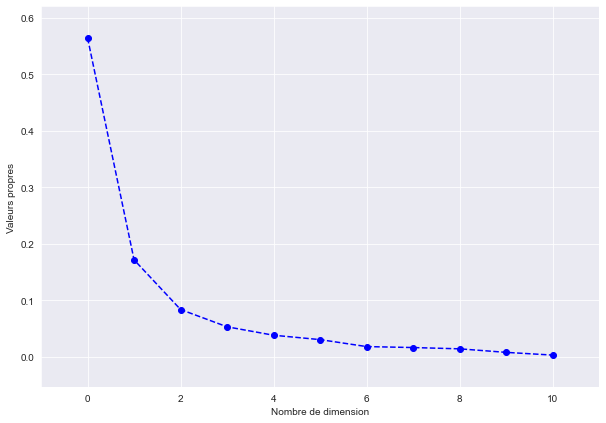

In [5]:
# variances expliquées
sns.set_style("darkgrid")
plt.figure(figsize=(10, 7))
plt.margins(0.1)
plt.xlabel('Nombre de dimension')
plt.ylabel('Valeurs propres')
plt.plot(ebouli, '--bo')
plt.show()
plt.close()

In [6]:
# Composantes principales
print('Composantes principales : \n', pca.components_) 

Composantes principales : 
 [[ 0.29879852  0.34592362  0.35142657  0.27620729  0.26119968  0.23766432
   0.34799528 -0.31521116 -0.33113896 -0.27312434  0.24869034]
 [-0.37926549 -0.29018832 -0.25996651  0.35249005  0.4752815   0.48875502
  -0.14803548 -0.1147486  -0.06435512 -0.09474813 -0.25911792]
 [ 0.13346441  0.02349891 -0.02623662  0.29928777  0.19328102  0.22673035
   0.1639512   0.35312893  0.43767169  0.50709601  0.44980708]
 [-0.33458459 -0.27144002 -0.13568305  0.0269321  -0.08220667 -0.12167058
   0.10539811  0.2608284  -0.07775812 -0.54224593  0.62806002]
 [ 0.16626289  0.19080036  0.34869193  0.10814229  0.11168245  0.08345638
  -0.29570882  0.58697002  0.2506592  -0.45576428 -0.28408538]
 [-0.28561891  0.1130742   0.10343567  0.74737916 -0.21859767 -0.47517857
   0.08712424  0.03994306 -0.09404882  0.11349952 -0.1785175 ]
 [ 0.17799615  0.06758501 -0.04664515  0.0803079   0.27447661 -0.23529181
  -0.73164528  0.01474805 -0.39102504  0.17814291  0.32290411]
 [-0.21033361

In [7]:
# Coordonnées des variables sur les composantes principales
columns = ['COMPONENT_' + str(i) for i in range(1, len(numerical_columns) + 1)]
data_coord_var = pd.DataFrame(pca.components_.T, index=numerical_columns, columns=columns)
data_coord_var.head()

,COMPONENT_1,COMPONENT_2,COMPONENT_3,COMPONENT_4,COMPONENT_5,COMPONENT_6,COMPONENT_7,COMPONENT_8,COMPONENT_9,COMPONENT_10,COMPONENT_11
T9,0.298799,-0.379265,0.133464,-0.334585,0.166263,-0.285619,0.177996,-0.210334,-0.184054,-0.626818,0.158735
T12,0.345924,-0.290188,0.023499,-0.271440,0.190800,0.113074,0.067585,0.202262,0.196571,0.195170,-0.741954
T15,0.351427,-0.259967,-0.026237,-0.135683,0.348692,0.103436,-0.046645,-0.055224,0.108409,0.556206,0.575491
Vx9,0.276207,0.352490,0.299288,0.026932,0.108142,0.747379,0.080308,-0.220887,0.102272,-0.268146,0.035910
Vx12,0.261200,0.475282,0.193281,-0.082207,0.111682,-0.218598,0.274477,0.110328,-0.660911,0.265229,-0.082760


In [8]:
# Coordonnées des individus sur les composantes principales
data_coord_ind = pd.DataFrame(data_coord_ind, columns=columns)
data_coord_ind.head()

,COMPONENT_1,COMPONENT_2,COMPONENT_3,COMPONENT_4,COMPONENT_5,COMPONENT_6,COMPONENT_7,COMPONENT_8,COMPONENT_9,COMPONENT_10,COMPONENT_11
0,-0.788626,1.231209,0.425140,-0.350503,-1.357834,0.668732,0.223615,0.358159,0.387170,-0.204625,0.225687
1,-1.843136,-0.394787,-0.301220,-0.008677,-1.153528,-0.449514,0.045066,0.301115,0.129707,-0.219941,0.033483
2,0.482297,2.614331,0.049353,0.245904,-0.649390,0.612587,-0.142802,-0.750297,-0.355913,-0.028484,0.036148
3,2.109507,1.645199,-1.797443,1.248235,-0.649394,0.293855,-0.323048,-0.063322,-0.185493,-0.210444,0.164896
4,-1.441069,-0.819424,1.604314,0.639404,-0.049789,0.658840,-0.094785,-0.131644,-0.285398,0.035689,-0.213749


In [9]:
data_coord_ind = pd.merge(data_coord_ind, data_y, left_index=True, right_index=True)

In [10]:
def cercleCorrelation(pc_infos, ebouli):
    plt.Circle((0,0), radius=10, color='g', fill=False)
    circle1 = plt.Circle((0,0),radius=1, color='g', fill=False)
    fig = plt.gcf()
    fig.gca().add_artist(circle1)
    for idx in range(len(pc_infos["COMPONENT_1"])):
        x = pc_infos["COMPONENT_1"][idx]
        y = pc_infos["COMPONENT_2"][idx]
        plt.plot([0.0,x],[0.0,y],'k-')
        plt.plot(x, y, 'rx')
        plt.annotate(pc_infos.index[idx], xy=(x,y))
    plt.xlabel("Component 1 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
    plt.ylabel("Component 2 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    plt.title("Cercle de corrélations")
    plt.show()
    plt.close()

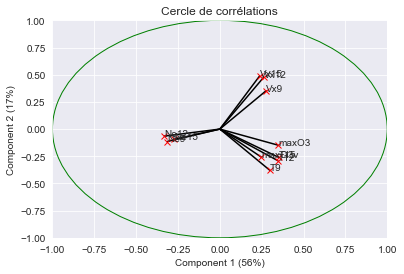

In [11]:
cercleCorrelation(pc_infos=data_coord_var, ebouli=ebouli)

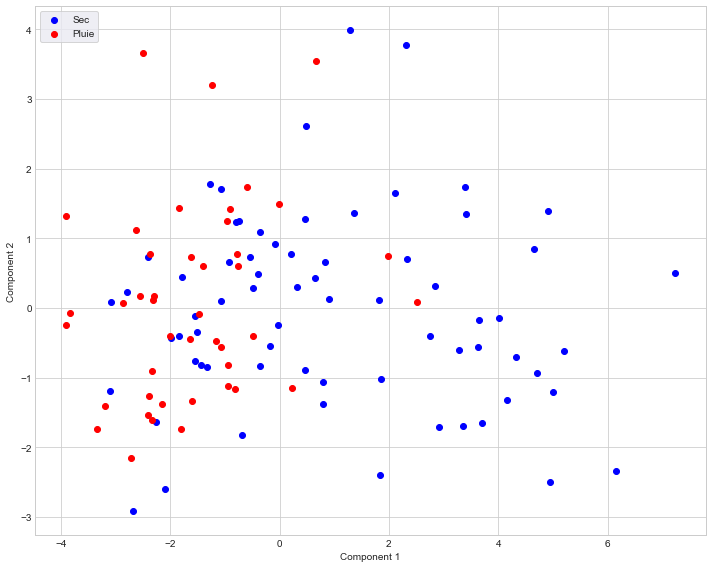

In [12]:
### représentation des individus sur les deux axes (couleur en fonction des valeurs de la variable catégorielle)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 8))
    for cat, col in zip(('Sec', 'Pluie'), ('blue', 'red')):
        plt.scatter(data_coord_ind["COMPONENT_1"][data_coord_ind['pluie'] == cat], 
                    data_coord_ind["COMPONENT_2"][data_coord_ind['pluie'] == cat], label=cat, c=col)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.cla()
plt.clf()
plt.close()

## Analyse factorielle des correspondances (AFC)   
<a id='afc'/>   

* L'AFC : étude	des	correspondances	entre les modalité de deux variables qualitatives.	

In [13]:
from fanalysis.ca import CA

df = pd.read_table("data/vaccsp.txt", sep = ";")
df = pd.crosstab(df.CSP, df.heber, values=df.effectif, aggfunc='sum').fillna(0)
display(df)

#lancer les calculs
afc = CA(row_labels=df.index, col_labels=df.columns)
afc.fit(df.values)

heber,AUTR,CAMP,HOTE,IRPP,IRSC,LOCA,RESS
CSP,,,,,,,
cadm,469.0,1320.0,738.0,1732.0,519.0,988.0,488.0
empl,301.0,499.0,317.0,825.0,199.0,480.0,138.0
esag,36.0,0.0,92.0,162.0,16.0,70.0,22.0
inac,269.0,361.0,923.0,1297.0,285.0,462.0,417.0
libe,414.0,600.0,677.0,1059.0,536.0,727.0,532.0
oups,671.0,3196.0,838.0,3647.0,325.0,1289.0,514.0
paic,85.0,176.0,387.0,446.0,123.0,344.0,143.0


CA(col_labels=Index(['AUTR', 'CAMP', 'HOTE', 'IRPP', 'IRSC', 'LOCA', 'RESS'], dtype='object', name='heber'),
   row_labels=Index(['cadm', 'empl', 'esag', 'inac', 'libe', 'oups', 'paic'], dtype='object', name='CSP'))

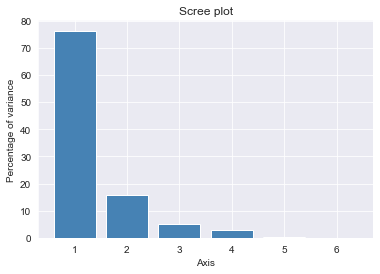

In [14]:
# Graphique des valeurs propres en pourcentage
afc.plot_eigenvalues(type="percentage")

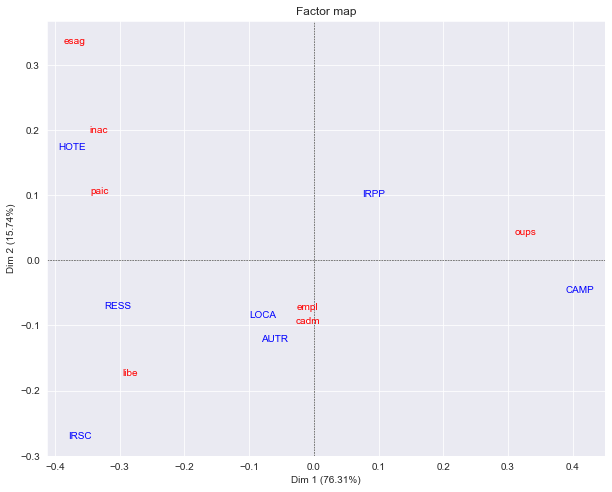

In [15]:
# Mapping simultané des points lignes et colonnes
afc.mapping(num_x_axis=1, num_y_axis=2, figsize=(10, 8))

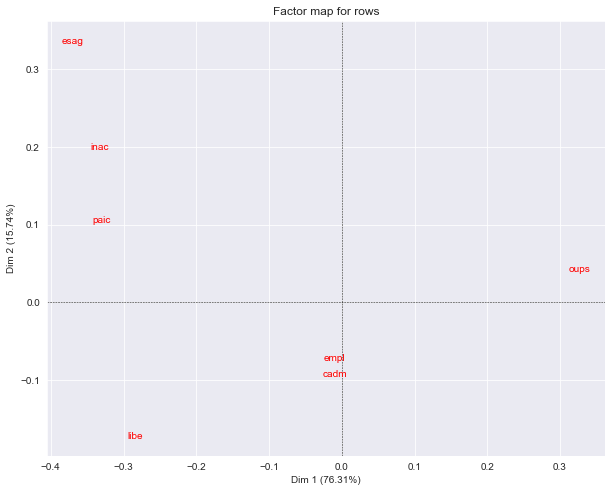

In [16]:
# Mapping des points lignes
afc.mapping_row(num_x_axis=1, num_y_axis=2, figsize=(10, 8))

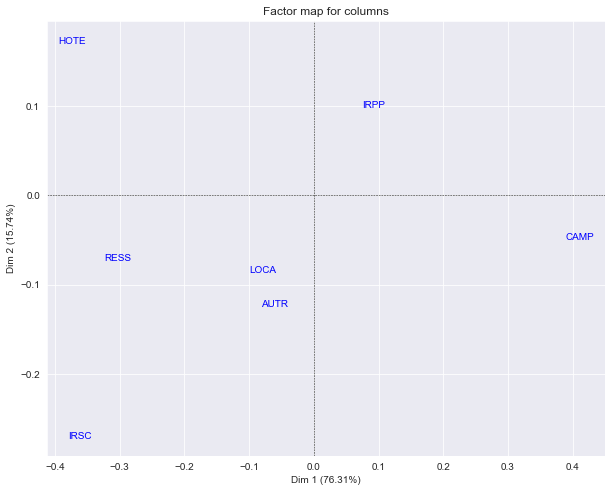

In [17]:
# Mapping des points colonnes
afc.mapping_col(num_x_axis=1, num_y_axis=2, figsize=(10, 8))

## Analyse des correspondances multiples (ACM)
<a id='acm'/>

* L’ACM	est une généralisation de l’AFC à plus de deux variables qualitatives
* Avant d'applique l'ACM il faut d'abord transformer toutes les variables catégorielles en variables binaires

In [18]:
import matplotlib.pyplot as plt 
import mca 

data_canines = pd.read_table("data/races_canines_acm.csv", sep=';')
data_canines.index = data_canines['Chien']
data_canines_x = data_canines.drop(['Chien', 'Fonction'], axis=1)
data_canines_x

,Taille,Poids,Velocite,Intelligence,Affection,Agressivite
Chien,,,,,,
Beauceron,Taille++,Poids+,Veloc++,Intell+,Affec+,Agress+
Basset,Taille-,Poids-,Veloc-,Intell-,Affec-,Agress+
Berger All,Taille++,Poids+,Veloc++,Intell++,Affec+,Agress+
Boxer,Taille+,Poids+,Veloc+,Intell+,Affec+,Agress+
Bull-Dog,Taille-,Poids-,Veloc-,Intell+,Affec+,Agress-
Bull-Mastif,Taille++,Poids++,Veloc-,Intell++,Affec-,Agress+
Caniche,Taille-,Poids-,Veloc+,Intell++,Affec+,Agress-
Chihuahua,Taille-,Poids-,Veloc-,Intell-,Affec+,Agress-
Cocker,Taille+,Poids-,Veloc-,Intell+,Affec+,Agress+


In [19]:
data_canines_dummyfied = pd.get_dummies(data_canines_x)

In [20]:
mca_ben = mca.MCA(data_canines_dummyfied)
mca_ind = mca.MCA(data_canines_dummyfied, benzecri=False)

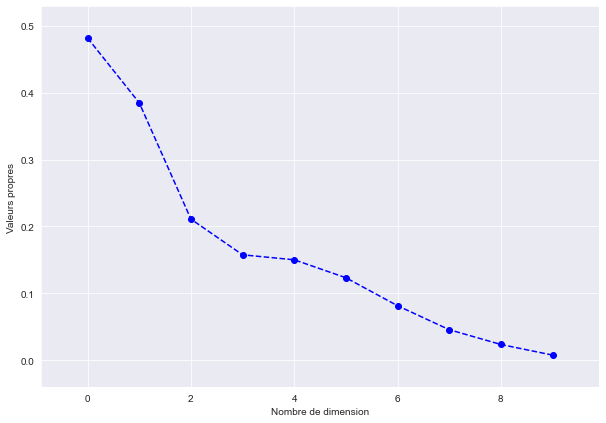

In [21]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 7))
plt.margins(0.1)
plt.xlabel('Nombre de dimension')
plt.ylabel('Valeurs propres')
plt.plot(mca_ind.L, '--bo')
plt.show()
plt.close()

**Les calculs suivans sont fortement inspirés de la documentation du package [MCA](https://github.com/esafak/mca)**

In [22]:
data = {'Iλ': pd.Series(mca_ind.L),
        'τI': mca_ind.expl_var(greenacre=False, N=10),
        'Zλ': pd.Series(mca_ben.L),
        'τZ': mca_ben.expl_var(greenacre=False, N=10),
        'cλ': pd.Series(mca_ben.L),
        'τc': mca_ind.expl_var(greenacre=True, N=10)}

# 'Indicator Matrix', 'Benzecri Correction', 'Greenacre Correction'
columns = ['Iλ', 'τI', 'Zλ', 'τZ', 'cλ', 'τc']
table2 = pd.DataFrame(data=data, columns=columns).fillna(0)
table2.index += 1
table2.loc['Σ'] = table2.sum()
table2.index.name = 'Factor'

table2

,Iλ,τI,Zλ,τZ,cλ,τc
Factor,,,,,,
1,0.481606,0.288964,0.199851,0.544996,0.199851,0.377461
2,0.384737,0.230842,0.118143,0.322179,0.118143,0.223139
3,0.210954,0.126572,0.025075,0.068380,0.025075,0.047360
4,0.157554,0.094532,0.010280,0.028034,0.010280,0.019416
5,0.150133,0.090080,0.008738,0.023827,0.008738,0.016503
6,0.123295,0.073977,0.004205,0.011468,0.004205,0.007943
7,0.081462,0.048877,0.000409,0.001116,0.000409,0.000773
8,0.045670,0.027402,0.000000,0.000000,0.000000,0.000000
9,0.023542,0.014125,0.000000,0.000000,0.000000,0.000000


Valeurs propres et leurs proportions (en pourcentage) pour les deux premiers facteurs.

In [23]:
data = np.array([mca_ben.L[:2], 
                 mca_ben.expl_var(greenacre=True, N=2) * 100]).T
df = pd.DataFrame(data=data, columns=['cλ','%c'], index=range(1,3))
df

,cλ,%c
1,0.199851,37.746086
2,0.118143,22.313896


In [24]:
# Coordonnées des indivus sur les facteurs
# Les contributions des indivus sur les axes factoriels
# Les cosinus au carré
# N : Nombre de axes retenus

fs, cos, cont = 'Factor score','Squared cosines', 'Contributions x 1000'
data_individus = pd.DataFrame(columns=data_canines_dummyfied.index.values, index=pd.MultiIndex.from_product([[fs, cos, cont], range(1, 3)]))

data_individus.loc[fs,    :] = mca_ben.fs_r(N=2).T
data_individus.loc[cos,   :] = mca_ben.cos_r(N=2).T
data_individus.loc[cont,  :] = mca_ben.cont_r(N=2).T * 1000

np.round(data_individus.astype(float), 2)

Beauceron  Basset  Berger All  Boxer  Bull-Dog  \
Factor score         1       0.20   -0.16        0.31  -0.29     -0.65   
                     2       0.23   -0.61        0.26   0.49     -0.30   
Squared cosines      1       0.33    0.06        0.42   0.21      0.79   
                     2       0.43    0.88        0.29   0.60      0.17   
Contributions x 1000 1       7.74    4.97       18.19  15.39     78.97   
                     2      16.80  116.74       20.77  74.85     29.11   

                        Bull-Mastif  Caniche  Chihuahua  Cocker  Colley  ...  \
Factor score         1         0.48    -0.59      -0.54   -0.47    0.08  ...   
                     2        -0.30     0.01      -0.47   -0.04    0.29  ...   
Squared cosines      1         0.57     0.81       0.54    0.76    0.04  ...   
                     2         0.22     0.00       0.40    0.01    0.61  ...   
Contributions x 1000 1        43.56    64.01      54.37   41.35    1.06  ...   
                     2        28.79     0.03      68.55    0.60   26.65  ...   

                        Gd Bleu Gasc  Labrador  Levrier  Mastiff  Pekinois  \
Factor score         1          0.33     -0.42     0.44     0.49     -0.54   
                     2          0.06      0.55     0.05    -0.49     -0.47   
Squared cosines      1          0.67      0.34     0.73     0.45      0.54   
                     2          0.02      0.60     0.01     0.46      0.40   
Contributions x 1000 1         20.58     32.22    35.21    43.94     54.37   
                     2          1.24     94.39     0.67    75.85     68.55   

                        Pointer  St-Bernard  Setter  Teckel  Terre-Neuve  
Factor score         1     0.43        0.38    0.32   -0.65         0.25  
                     2     0.23       -0.33    0.21   -0.30        -0.27  
Squared cosines      1     0.59        0.40    0.54    0.79         0.26  
                     2     0.17        0.31    0.22    0.17         0.31  
Contributions x 1000 1    34.87       26.17   19.55   78.97        11.31  
                     2    17.30       33.93   13.69   29.11        22.67  

[6 rows x 27 columns]

In [25]:
# Coordonnées des variables sur les facteurs
# Les cosinus au carré
# Les contributions des variables sur les axes factoriels
# N : Nombre de axes retenus


data_columns = pd.DataFrame(columns=data_canines_dummyfied.columns.values, index=pd.MultiIndex.from_product([[fs, cos, cont], range(1, 3)]))
data_columns.loc[fs,  :] = mca_ben.fs_c(N=2).T
data_columns.loc[cos, :] = mca_ben.cos_c(N=2).T
data_columns.loc[cont,:] = mca_ben.cont_c(N=2).T * 1000

np.round(data_columns.astype(float), 2)

Taille_Taille+  Taille_Taille++  Taille_Taille-  \
Factor score         1           -0.55             0.54           -0.76   
                     2            0.68             0.01           -0.51   
Squared cosines      1            0.33             0.99            0.65   
                     2            0.51             0.00            0.29   
Contributions x 1000 1           46.42           134.59          125.98   
                     2          121.71             0.10           95.87   

                        Poids_Poids+  Poids_Poids++  Poids_Poids-  \
Factor score         1          0.20           0.65         -0.75   
                     2          0.45          -0.54         -0.46   
Squared cosines      1          0.15           0.46          0.71   
                     2          0.81           0.32          0.26   
Contributions x 1000 1         16.74          66.04        140.10   
                     2        150.62          76.09         87.22   

                        Velocite_Veloc+  Velocite_Veloc++  Velocite_Veloc-  \
Factor score         1            -0.39              0.57            -0.21   
                     2             0.49              0.21            -0.58   
Squared cosines      1             0.34              0.72             0.11   
                     2             0.55              0.09             0.83   
Contributions x 1000 1            37.37             91.80            13.12   
                     2           101.17             19.96           175.17   

                        Intelligence_Intell+  Intelligence_Intell++  \
Factor score         1                 -0.24                   0.22   
                     2                  0.16                   0.25   
Squared cosines      1                  0.40                   0.14   
                     2                  0.18                   0.20   
Contributions x 1000 1                 22.74                   8.63   
                     2                 17.00                  20.32   

                        Intelligence_Intell-  Affection_Affec+  \
Factor score         1                  0.22             -0.50   
                     2                 -0.45              0.15   
Squared cosines      1                  0.15              0.90   
                     2                  0.60              0.08   
Contributions x 1000 1                 12.49            107.91   
                     2                 83.91             16.01   

                        Affection_Affec-  Agressivite_Agress+  \
Factor score         1              0.54                 0.28   
                     2             -0.16                -0.12   
Squared cosines      1              0.90                 0.55   
                     2              0.08                 0.10   
Contributions x 1000 1            116.22                31.03   
                     2             17.24                 9.13   

                        Agressivite_Agress-  
Factor score         1                -0.26  
                     2                 0.11  
Squared cosines      1                 0.55  
                     2                 0.10  
Contributions x 1000 1                28.81  
                     2                 8.48

### Projection des individus sur le plan factoriel

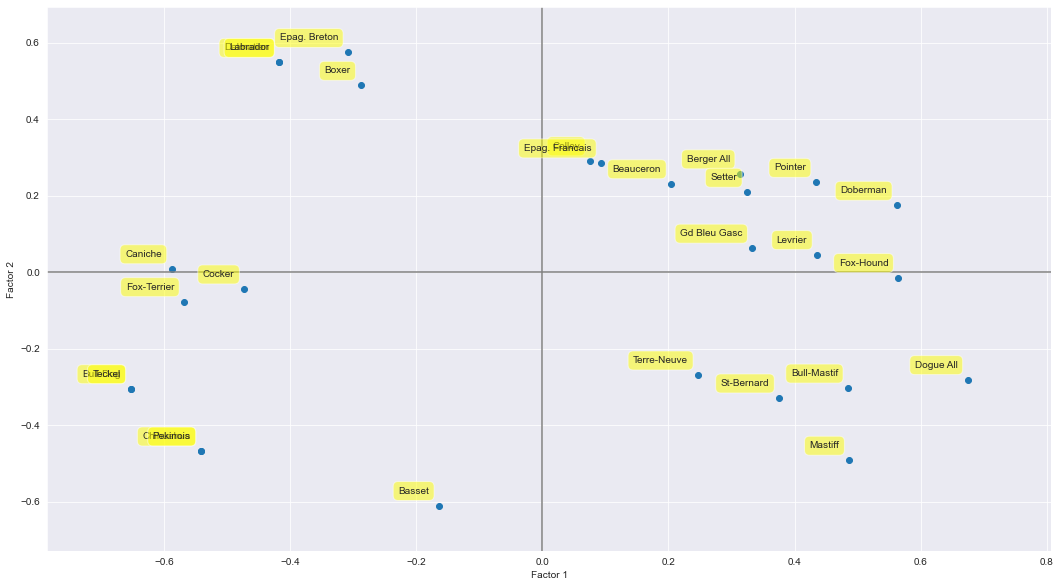

In [26]:
score_data = pd.DataFrame(data_individus.loc[fs].values.T, columns=['X', 'Y'])
score_data = pd.merge(score_data,
                      data_canines[['Fonction', 'Chien']].reset_index(drop=True),
                      left_index=True,
                      right_index=True)
labels_ind = data_individus.columns.values
points_ind = data_individus.loc[fs].values
fontions = tuple(data_canines.Fonction.unique())
colors = ('blue','red', 'green', 'yellow')

sns.set_style("darkgrid")

X_reduced = score_data
plt.figure(figsize=(18,10))
plt.scatter(score_data.X, score_data.Y)
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')

for label, x, y in zip(labels_ind, score_data.X, score_data.Y):
    plt.annotate(
                label,
                xy = (x, y), xytext = (-10, 10),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    )
plt.show()
plt.close()

### Projection des modalités

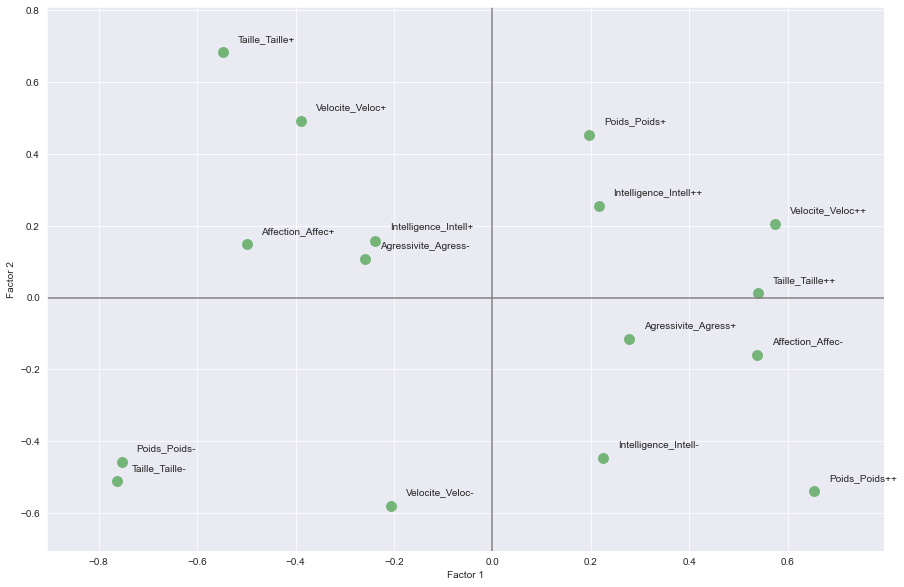

In [27]:
plt.figure(figsize=(15, 10))
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
points_col = data_columns.loc[fs].values
labels_col = data_columns.columns.values
sns.set_style("darkgrid")
plt.scatter(*points_col, s=120, marker='o', c='g', alpha=.5, linewidths=0)
for label, x, y in zip(labels_col, *points_col):
    plt.annotate(label, xy=(x, y), xytext=(x + .03, y + .03))
plt.show()

### Projection des modalités et individus sur le plan factoriel

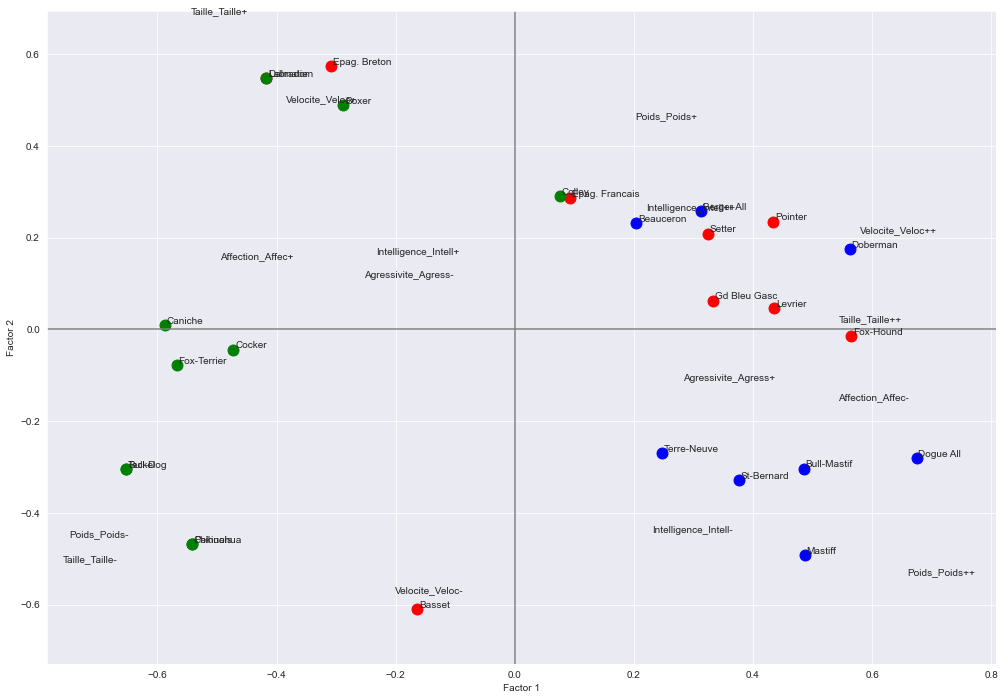

In [28]:
sns.set_style("darkgrid")
plt.figure(figsize=(17, 12))
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')

for cat, col in zip(fontions, colors):
        plt.scatter(score_data["X"][score_data['Fonction'] == cat], 
                    score_data["Y"][score_data['Fonction'] == cat],
                    label=cat, c=col, s=120, marker='o')

for label, x, y in zip(labels_ind, *points_ind):
    plt.annotate(label, xy=(x, y), xytext=(x + .003, y + .003))

for label, x, y in zip(labels_col, *points_col):
    plt.annotate(label, xy=(x, y), xytext=(x + .005, y + .005))
    
plt.show()
plt.close()

## Décomposition en valeurs singulières
<a id='svd'/>

La SVD est une technique très utilisée dans l'analyse multidimensionnelle. Elle sert :
 * factoriser des matrices
 * trouver une approximation de rang inférieur d'une matrice
 * ...

In [29]:
from scipy.linalg import svd 
# Génération d'un matrice n x p
X = np.random.uniform(-1,0,100).reshape((10, 10))
# SVD
U, s, V = np.linalg.svd(X, full_matrices=False)
# Valeurs singulières
s

array([4.64768325, 1.47660995, 1.07475379, 0.99673145, 0.80714452,
       0.73994145, 0.52131954, 0.45072601, 0.32286365, 0.10743595])

In [30]:
# Vérifier l'orthonormalité des vecteurs
print(np.allclose(np.eye(10, 10), np.dot(U.T, U)))
print(np.allclose(np.eye(10, 10), np.dot(V.T, V)))

True
True


In [31]:
# Vérifier la reconstruction de X
np.allclose(X, np.dot(U, np.dot(np.diag(s), V)))

True

## Positionnement multidimensionnel (MDS)
<a id='mds' />

Le MDS cherche à représenter des individus dans un repère euclidien à partir d'une matrice de proximité (similarité ou dissimilarité).

In [32]:
data = pd.read_csv("data/mds_data.csv", sep=";")
city_names = ["Adelaide", "Alice Springs", "Brisbane", "Darwin", "Hobart",  "Melbourne", "Perth", "Sydney"]
data = data.drop("X", axis=1)
data

,A,AS,B,D,H,M,P,S
0,0,1328,1600,2616,1161,653,2130,1161
1,1328,0,1962,1289,2463,1889,1991,2026
2,1600,1962,0,2846,1788,1374,3604,732
3,2616,1289,2846,0,3734,3146,2652,3146
4,1161,2463,1788,3734,0,598,3008,1057
5,653,1889,1374,3146,598,0,2720,713
6,2130,1991,3604,2652,3008,2720,0,3288
7,1161,2026,732,3146,1057,713,3288,0


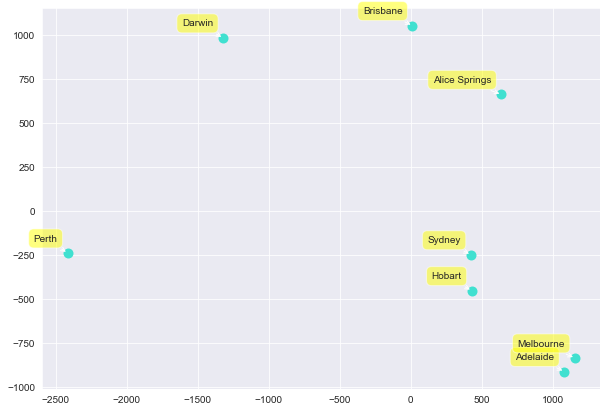

In [33]:
from sklearn.manifold import MDS 
from sklearn.metrics.pairwise import euclidean_distances 
import matplotlib.pyplot as plt

mds = MDS(n_components=5, dissimilarity="precomputed", random_state=12345) 
data_fitted = mds.fit_transform(euclidean_distances(data))

comp_1 = data_fitted[:, 0] 
comp_2 = data_fitted[:, 1] 

plt.figure(figsize=(10, 7))
sns.set_style("darkgrid")
plt.scatter(comp_1, comp_2, color='turquoise', s=100, lw=0, label='MDS')
for i in range(len(comp_1)):
    x = comp_1[i]
    y = comp_2[i]
    plt.annotate(city_names[i], (x, y), xytext=(-10, 10),
                textcoords='offset points', ha = 'right', va = 'bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
plt.show()

## Auto-encodeurs
<a id='aue' />

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.preprocessing import StandardScaler

sns.set()
rcParams['figure.figsize'] = 7, 7

df = pd.read_csv("data/ozone.csv",sep=";")
df = df.drop("obs", axis=1)

print("Nbre d'observation : {}\nNbre de variables : {}".format(*df.shape))
display(df.head(n=2))
print()
display(df.tail(n=2))

Nbre d'observation : 112
Nbre de variables : 13


,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec
1,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec


,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
110,83,16.9,19.8,22.1,6,5,3,-4.0,-3.7588,-4.0,99,Ouest,Pluie
111,70,15.7,18.6,20.7,7,7,7,0.0,-1.0419,-4.0,83,Sud,Sec


In [35]:
numerical_columns = ['T9', 'T12', 'T15',  'Vx9', 'Vx12', 'Vx15', 'maxO3', 'Ne9', 'Ne12', 'Ne15', 'maxO3v']
categorical_columns = ['vent', 'pluie']

data_x = df[numerical_columns]
data_x = StandardScaler().fit_transform(data_x)
_, n_variables = data_x.shape
nb_epoch = 200
batch_size = 32

In [36]:
# Création de l'encodeur
input_encoder = layers.Input(shape=(n_variables,))
encoded = layers.Dense(8, activation='tanh')(input_encoder)
encoded = layers.Dense(4, activation='tanh')(encoded)
encoder = keras.models.Model(input_encoder, encoded)

# Création du décodeur
input_decoder = layers.Input(shape=(4, ))
decoded = layers.Dense(8, activation='tanh')(input_decoder)
decoded = layers.Dense(n_variables, activation='tanh')(decoded)
decoder = keras.models.Model(input_decoder, decoded)

input_auto = layers.Input(shape=(n_variables,))
encoded = encoder(input_auto)
decoded = decoder(encoded)

# Création de l'auto-encodeur
autoencoder = keras.models.Model(input_auto, decoded)
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mse'])

autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
model (Functional)           (None, 4)                 132       
_________________________________________________________________
model_1 (Functional)         (None, 11)                139       
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [37]:
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

In [38]:
history = autoencoder.fit(data_x,
                          data_x,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_split=0.2,
                          verbose=1,
                          callbacks=[checkpointer, tensorboard]).history

Epoch 1/200
3/3 [==============================] - 1s 253ms/step - loss: 1.0959 - mse: 1.0959 - val_loss: 1.0175 - val_mse: 1.0175
Epoch 2/200
3/3 [==============================] - 0s 15ms/step - loss: 0.9474 - mse: 0.9474 - val_loss: 0.9910 - val_mse: 0.9910
Epoch 3/200
3/3 [==============================] - 0s 34ms/step - loss: 1.0014 - mse: 1.0014 - val_loss: 0.9655 - val_mse: 0.9655
Epoch 4/200
3/3 [==============================] - 0s 19ms/step - loss: 0.9190 - mse: 0.9190 - val_loss: 0.9412 - val_mse: 0.9412
Epoch 5/200
3/3 [==============================] - 0s 11ms/step - loss: 0.9722 - mse: 0.9722 - val_loss: 0.9184 - val_mse: 0.9184
Epoch 6/200
3/3 [==============================] - 0s 12ms/step - loss: 0.9238 - mse: 0.9238 - val_loss: 0.8976 - val_mse: 0.8976
Epoch 7/200
3/3 [==============================] - 0s 25ms/step - loss: 0.9388 - mse: 0.9388 - val_loss: 0.8784 - val_mse: 0.8784
Epoch 8/200
3/3 [==============================] - 0s 17ms/step - loss: 0.8489 - mse: 0.8

3/3 [==============================] - 0s 26ms/step - loss: 0.4922 - mse: 0.4922 - val_loss: 0.5023 - val_mse: 0.5023
Epoch 64/200
3/3 [==============================] - 0s 34ms/step - loss: 0.4904 - mse: 0.4904 - val_loss: 0.4997 - val_mse: 0.4997
Epoch 65/200
3/3 [==============================] - 0s 15ms/step - loss: 0.4678 - mse: 0.4678 - val_loss: 0.4970 - val_mse: 0.4970
Epoch 66/200
3/3 [==============================] - 0s 16ms/step - loss: 0.4653 - mse: 0.4653 - val_loss: 0.4946 - val_mse: 0.4946
Epoch 67/200
3/3 [==============================] - 0s 15ms/step - loss: 0.4937 - mse: 0.4937 - val_loss: 0.4919 - val_mse: 0.4919
Epoch 68/200
3/3 [==============================] - 0s 15ms/step - loss: 0.4940 - mse: 0.4940 - val_loss: 0.4894 - val_mse: 0.4894
Epoch 69/200
3/3 [==============================] - 0s 16ms/step - loss: 0.4538 - mse: 0.4538 - val_loss: 0.4869 - val_mse: 0.4869
Epoch 70/200
3/3 [==============================] - 0s 42ms/step - loss: 0.4992 - mse: 0.4992 - 

3/3 [==============================] - 0s 21ms/step - loss: 0.4168 - mse: 0.4168 - val_loss: 0.3960 - val_mse: 0.3960
Epoch 126/200
3/3 [==============================] - 0s 17ms/step - loss: 0.3538 - mse: 0.3538 - val_loss: 0.3950 - val_mse: 0.3950
Epoch 127/200
3/3 [==============================] - 0s 27ms/step - loss: 0.3836 - mse: 0.3836 - val_loss: 0.3939 - val_mse: 0.3939
Epoch 128/200
3/3 [==============================] - 0s 16ms/step - loss: 0.3803 - mse: 0.3803 - val_loss: 0.3928 - val_mse: 0.3928
Epoch 129/200
3/3 [==============================] - 0s 27ms/step - loss: 0.4045 - mse: 0.4045 - val_loss: 0.3920 - val_mse: 0.3920
Epoch 130/200
3/3 [==============================] - 0s 15ms/step - loss: 0.4033 - mse: 0.4033 - val_loss: 0.3910 - val_mse: 0.3910
Epoch 131/200
3/3 [==============================] - 0s 22ms/step - loss: 0.3854 - mse: 0.3854 - val_loss: 0.3901 - val_mse: 0.3901
Epoch 132/200
3/3 [==============================] - 0s 17ms/step - loss: 0.4027 - mse: 0.

3/3 [==============================] - 0s 17ms/step - loss: 0.3284 - mse: 0.3284 - val_loss: 0.3456 - val_mse: 0.3456
Epoch 188/200
3/3 [==============================] - 0s 18ms/step - loss: 0.3429 - mse: 0.3429 - val_loss: 0.3449 - val_mse: 0.3449
Epoch 189/200
3/3 [==============================] - 0s 18ms/step - loss: 0.3695 - mse: 0.3695 - val_loss: 0.3443 - val_mse: 0.3443
Epoch 190/200
3/3 [==============================] - 0s 17ms/step - loss: 0.3471 - mse: 0.3471 - val_loss: 0.3438 - val_mse: 0.3438
Epoch 191/200
3/3 [==============================] - 0s 19ms/step - loss: 0.3210 - mse: 0.3210 - val_loss: 0.3431 - val_mse: 0.3431
Epoch 192/200
3/3 [==============================] - 0s 18ms/step - loss: 0.3502 - mse: 0.3502 - val_loss: 0.3425 - val_mse: 0.3425
Epoch 193/200
3/3 [==============================] - 0s 17ms/step - loss: 0.3252 - mse: 0.3252 - val_loss: 0.3419 - val_mse: 0.3419
Epoch 194/200
3/3 [==============================] - 0s 18ms/step - loss: 0.3340 - mse: 0.

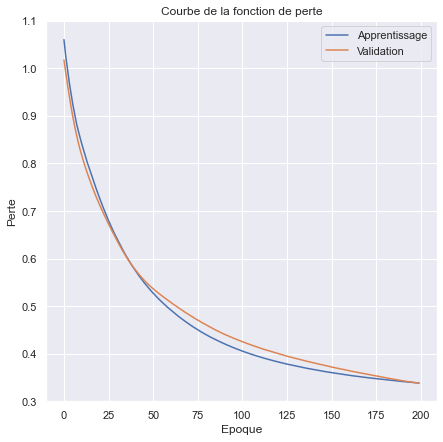

In [39]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Courbe de la fonction de perte')
plt.ylabel('Perte')
plt.xlabel('Epoque')
plt.ylim([0.3, 1.1])
_ = plt.legend(['Apprentissage', 'Validation'], loc='upper right')

**Compresser des données**

In [40]:
data_comp = encoder.predict(data_x)
pd.DataFrame(data_comp).describe()

,0,1,2,3
count,112.000000,112.000000,112.000000,112.000000
mean,-0.013749,-0.022720,-0.251619,0.069710
std,0.579337,0.635131,0.637485,0.603997
min,-0.962239,-0.968677,-0.951317,-0.921340
25%,-0.600550,-0.619097,-0.733772,-0.545025
50%,0.000188,0.045739,-0.554250,0.190053
75%,0.461050,0.478584,0.230804,0.616466
max,0.956085,0.982915,0.959435,0.906593


**Décompresser des données**

In [41]:
data_decomp = decoder.predict(data_comp)
pd.DataFrame(data_decomp).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,0.022854,-0.058372,0.002854,0.028073,-0.054969,-0.063583,-0.125045,0.087808,0.110268,0.033618,-0.096395
std,0.557591,0.650854,0.614447,0.694845,0.646884,0.681835,0.697474,0.715600,0.672933,0.661925,0.684370
min,-0.749018,-0.904379,-0.845137,-0.924006,-0.920340,-0.957813,-0.886480,-0.937211,-0.915722,-0.924404,-0.910523
25%,-0.427436,-0.594040,-0.500062,-0.746775,-0.749774,-0.792882,-0.729705,-0.732114,-0.484453,-0.676089,-0.695600
50%,-0.110445,-0.208269,-0.208435,0.174433,0.074367,-0.015151,-0.482407,0.128489,0.362389,0.162508,-0.417456
75%,0.661589,0.541171,0.670727,0.674399,0.542304,0.581638,0.706395,0.830014,0.703992,0.655884,0.743575
max,0.930010,0.965978,0.949753,0.967171,0.934748,0.967349,0.971376,0.920794,0.911796,0.864288,0.968759


**Sources** :    
[WikiStat](https://github.com/wikistat)   
[Documentation du package MCA](https://github.com/esafak/mca)   
[Cercle of correlations](https://github.com/mazieres/analysis/blob/master/analysis.py#L19-34)   
[Documentation du package fanalysis](https://github.com/OlivierGarciaDev/fanalysis) 